Assignment 2 - Image Rendering 
-------------------------------
Jared Mercier - 2017-11-01
-------------------------------


1. Jupyter Notebook
-----------------



$1$. Provide a screen-shot of the Notebook 05ImageRendering where a different clip limit has been used to render the image





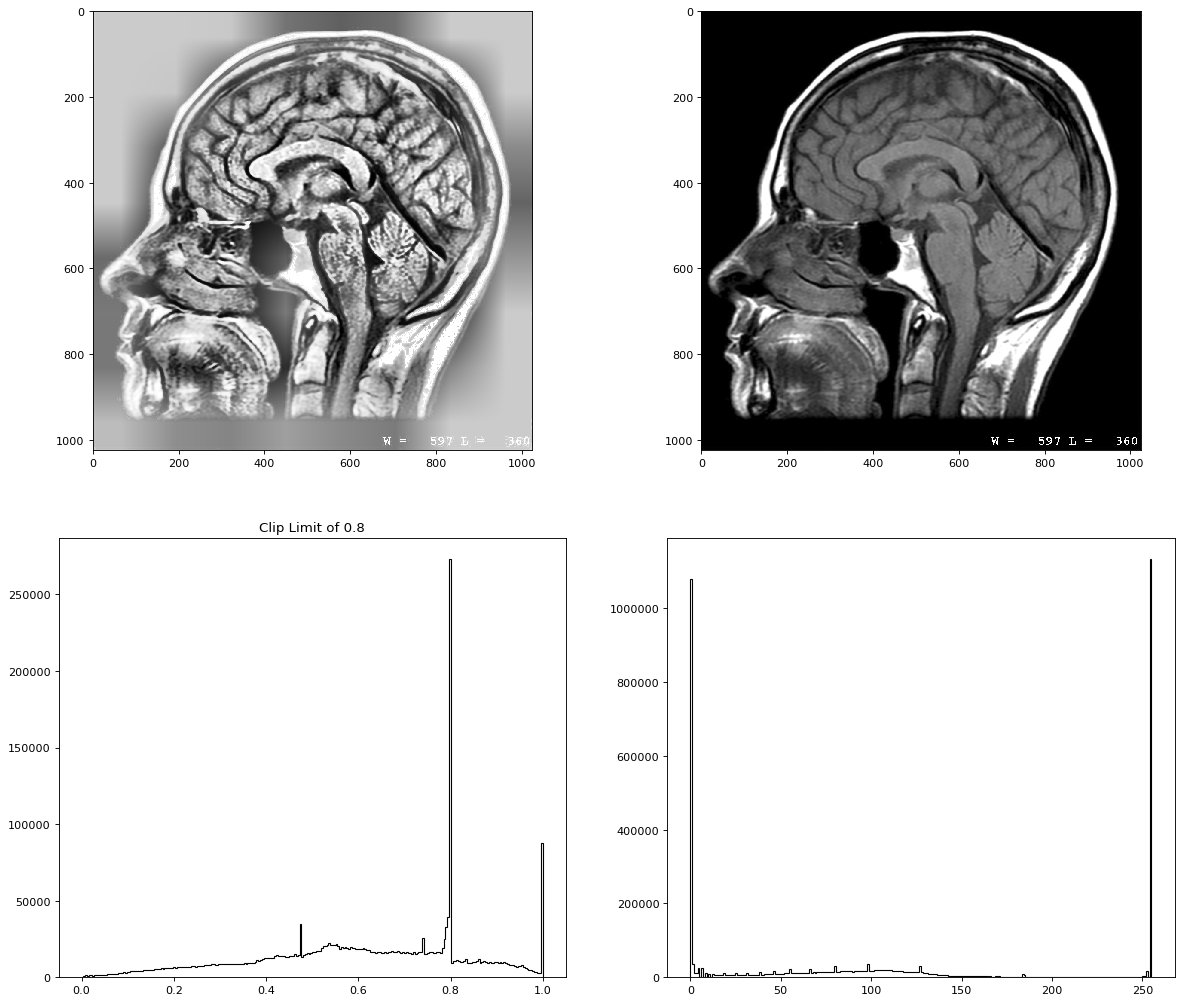

In [2]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
brainpic = novice.open('braincomplete.png')
brainpicarray = mpimg.imread('braincomplete.png','True') 
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


#Clip limit 0f 0.8
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.8)
plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
plt.title('Clip Limit of 0.8')
ht=plt.hist(img_adapteq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')

$2$. Provide the syntax, parameters and a brief explanation of the function equalize hist from the Python documentation 

If for example, an 8-bit encoded image contains more dense regions of pixel values from 0-10, this would indicate the image is dark. Therefore, using histogram equalization, it can distribute the pixels uniformly throughout the 0-255 spectrum, which may result in a brighter image than previously. The following example provides a detailed explanation with the syntax and parameters for this function.


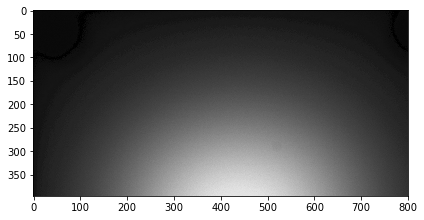

Original (8-bit encoding) the range is: 229


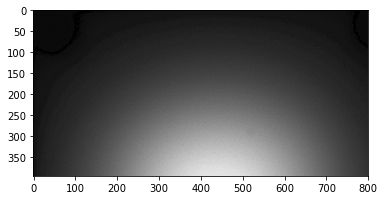

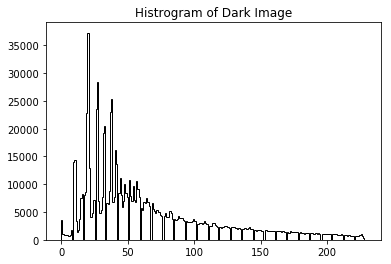

In [5]:
#First plotting a dark image
pic = novice.open('pic.png')
pic.show()
pic = mpimg.imread('pic.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(pic)))
bp=plt.subplot(111)
plt.imshow(pic)
#Plot the histogram to view pixel values 
plt.figure()
plt.title('Histrogram of Dark Image')
ht=plt.hist(pic.ravel(), bins=256, histtype='step', color='black')

Observing the above histogram, the pixels are located in the darker region of the spectrum. Can you use the equalization to brighten the image up.

The syntax for equalize hist is: equalize_hist(image, nbins=256, mask=None)

The parameters are the following:
1. Image:Array
2. nBins: int, optional
3. mask: ndarray of bools or 0s and 1s, optional

And the return is the equalized image.

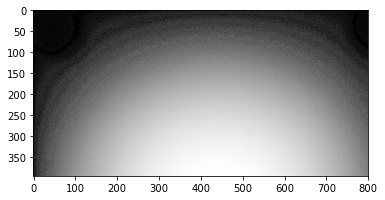

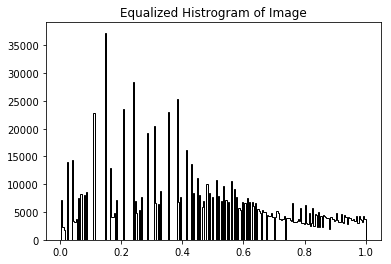

In [6]:
#Next, using the histogram equalization
img_eq = exposure.equalize_hist(pic)
plt.subplot(111)
plt.imshow(img_eq)
plt.figure()
plt.title('Equalized Histrogram of Image')
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')

$3.$ Provide the syntax, parameters and a brief explanation of the function equalize adapthist from the Python documentation

Unlike histogram equalization which focuses on rendering the entire image, adaptive histogram equalization enhances local regions.  Adaptive histogram equalization can focus on specific pixel regions, and can alter the contrast locally. For example, if an 8-bit image contains pixel values near the 250-255 ranges, the image is bright. With the adaptive histogram equalization, you can choose where the image should be enhanced (local contrast enhance). Meaning, this algorithm can focus the pixel density on a specific value. The following example explains this imaging rendering technique in more detail.

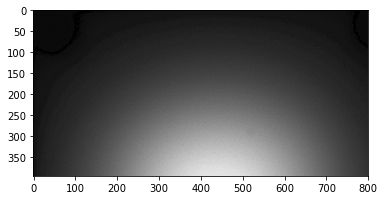

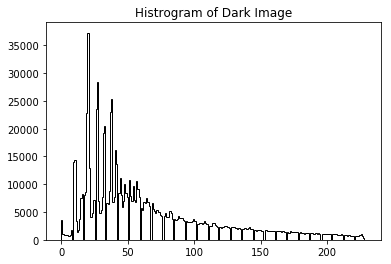

In [18]:
# Plot the image before the adaptive histogram equalization
bp=plt.subplot(111)
plt.imshow(pic)
plt.figure()
plt.title('Histrogram of Dark Image')
ht=plt.hist(pic.ravel(), bins=256, histtype='step', color='black')

The syntax for equalize hist is: equalize_adapthist(image, kernel_size=None, clip_limit=, nbins=256)

The parameters are the following:
1. Image:Array
2. kernel_size: integer or list-like,
3. clip_limit : float or optional
4. nbins : int or optional

And the return is the equalized image.

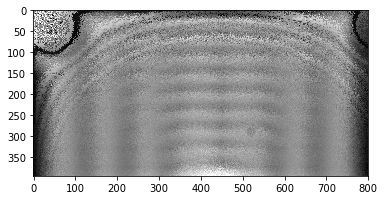

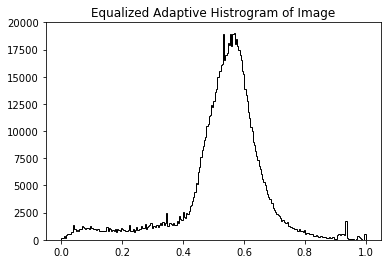

In [20]:
#Using a clip limit of 0.5, the pixels will be focused in this region
#Meaning, there will be an enhancement of contrast locally in the region of 0.5
img_adapteq = exposure.equalize_adapthist(pic, clip_limit=0.5)
plt.subplot(111)
plt.imshow(img_adapteq)
plt.figure()
plt.title('Equalized Adaptive Histrogram of Image')
ht=plt.hist(img_adapteq.ravel(), bins=256, histtype='step', color='black')

$4.$ In your own words, when would you use adaptive histogram equalization vs standard histogram equalization? Which one was more useful in the Notebook for you to notice details in the anatomy?


Comparing histogram equalization and adaptive histogram equalization below.


Compare image rendering techniques


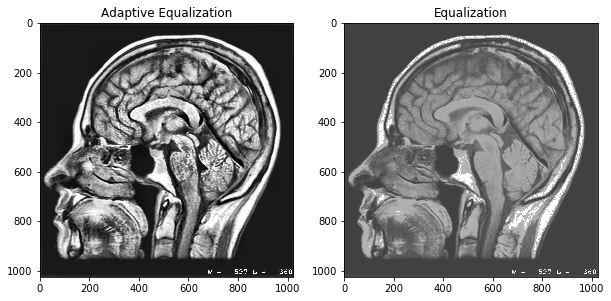

In [147]:
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.1)
img_eq = exposure.equalize_hist(brainpicarray)

plt.subplots(2,2,figsize=(10,10))
plt.subplot(121)
plt.imshow(img_adapteq)
plt.title("Adaptive Equalization")
plt.subplot(122)
plt.imshow(img_eq)
plt.title("Equalization")

print('Compare image rendering techniques')

The adaptive equalization provides a finer amount of detail compared to equalization. Therefore, providing a more useful image rendering technique to notice details in the anatomy. A problem with the adaptive technique is that it seems to amplify 'useless' information, which can be a problem if the diagnosis is searching for large abnormalities in the brain, such as a tumor. The non-adaptive technique does not separate the structures into finer details, which may be more useful in some cases. Concluding that the adaptive technique is useful for locating fine lines and the non-adaptive technique is useful for observing larger areas, in particular enhancement of the grey scales.

2. Investigation Assignment
----------------------------



A technique commonly used for image enhancement is morphology or otherwise known as morphological operators. As the word suggests, morphology is the study of shapes. With respect to image processing, it is a method used to analyze objects and interactions of an image with reference to a structuring element. Allowing these operators to morph the image based on the interactions with the structuring element. The element is an essential part for this image enhancement technique, as it is used to probe the image. The selectivity of the element for probing is determined by both the shape and size of the image. This technique mainly finds use in filtering images, such as removing noise in the background, cleaning distorted pixel areas and contrast enhancement. In binary images, morphlogical operators can be used as an image enhancement technique, to remove the two most common additive noise sources: Gaussian and salt-and-pepper [2]. Guassian due to electrical noise and salt-and-pepper due to faulty memory and timing errors. This image enhancement technique can applied to either binary or grey scale images. 

The following is an example to explain the fundamentals of these operators. Suppose a binary input image contains a $m$ by $n$ image $I$. And also suppose a specific region of this image (matrix) contains unwanted pixel values or noise. 

$$ I_{noisyregion} = \left[
    \begin{array}{ccc}
      1&1&1\\
    \end{array}
\right] $$

Using a structural element, $S$.

$$ S = \left[
    \begin{array}{ccc}
      0&0&0\\
    \end{array}
\right] $$

Resulting in the output image $O$.

$$ O = \left[
    \begin{array}{ccc}
      0&0&0\\
    \end{array}
\right] $$


This is an example of erosion, which is one of the fundamental operators of morphology. Another fundamental operator is dilation. Dilation can be used in bridging gaps between obstructed or distorted pixels. Which is erosion's counter-part. Since it is used for eroding the image and eliminating unwanted pixels [4]. Some other commonly used operators are opening, closing, black hat, and white hat.

The python syntax that can provide this functionality is supported by scikit image processing toolbox. An example for using the morphological operator erosion are the following: eroded_Image = erosion(parameters). The parameters that need to be passed to this function is the image (in array form) desired to be eroded. The rest of the parameters are optional, which are the structural element or selem (array of 1's and 0's), pointer to an output array which the function will place the morphology result into, and lastly a shift x or shift y to shift the structuring element (Boolean). Below are a few examples of the operators applied to the original brain image. It should be noted that no structural element was passed to the operators, and the default one was used.

Morphology finds use in a variety of medical modalities. It can be used in MRI technology for the process of detecting brain tumours [1]. Another example is using morphological operators in neural networks. Which are used for detecting and classify cancer from mammograms, which were obtained through X-Ray technology [3].

Detection of human brain tumour using MRI image segmentation and morphological operators. This paper discusses using detected tumours which are rectified using morphological operators. The operators are used to separate the normal cells from the cancer cells [1].



Morophological Operators on Brain Picture


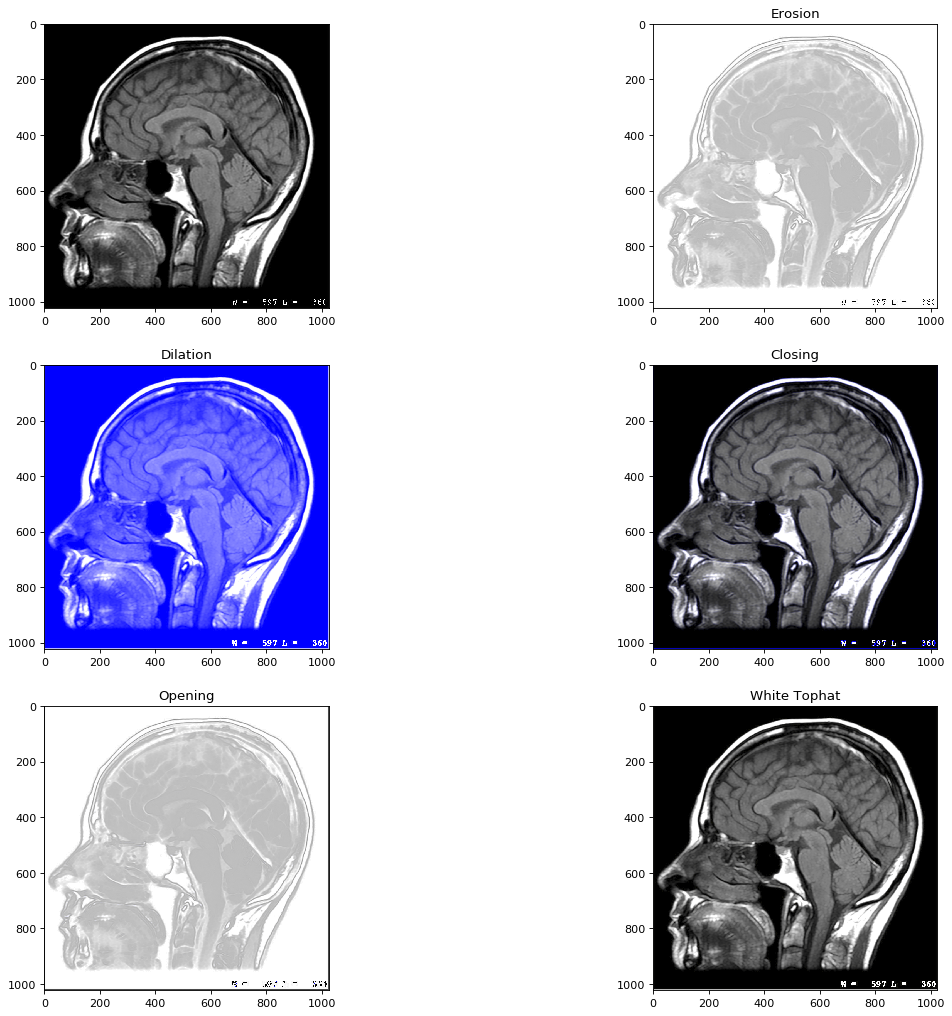

In [7]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,2,1)
plt.imshow(brainpicarray)

eroded = erosion(brainpicarray)
plt.subplot(3,2,2)
plt.imshow(eroded)
plt.title('Erosion')

dilated = dilation(brainpicarray)
plt.subplot(3,2,3)
plt.imshow(dilated)
plt.title('Dilation')

closing = closing(brainpicarray)
plt.subplot(3,2,4)
plt.imshow(closing)
plt.title('Closing')

opening = opening(brainpicarray)
plt.subplot(3,2,5)
plt.imshow(opening)
plt.title('Opening')

wth = white_tophat(brainpicarray)
plt.subplot(3,2,6)
plt.imshow(wth)
plt.title('White Tophat')

print('Morophological Operators on Brain Picture')

Biblography
-----------



[1] A. Nandi, "Detection of human brain tumour using MRI image segmentation and morphological operators," 2015 IEEE International Conference on Computer Graphics, Vision and Information Security (CGVIS), Bhubaneswar, 2015, pp. 55-60. doi: 10.1109/CGVIS.2015.7449892



[2] N. Jamil, T. M. T. Sembok and Z. A. Bakar, "Noise removal and enhancement of binary images using morphological operations," 2008 International Symposium on Information Technology, Kuala Lumpur, Malaysia, 2008, pp. 1-6. doi: 10.1109/ITSIM.2008.4631954


[3] W. W. Azevedo et al., "Morphological extreme learning machines applied to detect and classify masses in mammograms," 2015 International Joint Conference on Neural Networks (IJCNN), Killarney, 2015, pp. 1-8. doi: 10.1109/IJCNN.2015.7280774


[4] Rafael C. Gonzalez and Richard E. Woods, *Digital Image Processing, Second Edition*. Prentice Hall, 2001.


Python Documentation: 

* http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/Digital_Image_Processing_2ndEd.pdf

* http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist

* http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist 

* http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_morphology.html

